# CollabMP3

### Connecting Spotify

In [1]:
!pip install spotipy

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

birdy_uri = 'spotify:artist:6XyY86QOPPrYVGvF9ch6wz'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id='808325297aab40ae95147c06419ed138', client_secret='0c85b6d7358a4f7194788d0a87ddfb10'))

results = spotify.artist_albums(birdy_uri, album_type='album')
albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Hybrid Theory (20th Anniversary Edition)
One More Light Live
One More Light Live
One More Light
The Hunting Party: Acapellas + Instrumentals
The Hunting Party
The Hunting Party
RECHARGED
LIVING THINGS: Acapellas and Instrumentals
LIVING THINGS
A Thousand Suns Live Around the World
Minutes to Midnight Live Around the World
Meteora Live Around the World
Hybrid Theory Live Around the World
A Thousand Suns
A Thousand Suns
A Thousand Suns (Bonus Edition)
A Thousand Suns
A Thousand Suns
Road to Revolution (Live at Milton Keynes)
Road to Revolution (Live at Milton Keynes)
Minutes to Midnight
Minutes to Midnight
Minutes to Midnight
Minutes To Midnight
Minutes to Midnight
Minutes to Midnight
Minutes to Midnight
Minutes to Midnight (Deluxe Edition)
Minutes to Midnight (Deluxe Edition)
Minutes to Midnight
Live in Texas
Meteora (Bonus Edition)
Meteora (Bonus Edition)
Meteora
Reanimation
Reanimation
Reanimation
Reanimation
Reanimation
Hybrid Theory (Bonus Edition)
Hybrid Theory (Int'l Only DMD w/ A

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

lz_uri = 'spotify:artist:6XyY86QOPPrYVGvF9ch6wz'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id='2e01fb70abfd40ae8b2a5c6d26b14342',
        client_secret= 'c83aaf8534e5452a9db69971fb83a666',))
results = spotify.artist_top_tracks(lz_uri)

for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

track    : Lost
audio    : https://p.scdn.co/mp3-preview/94ecce736afb1d39b32355dabcbe2680d302c2ae?cid=808325297aab40ae95147c06419ed138
cover art: https://i.scdn.co/image/ab67616d0000b2738542fd936fb29c16b4a9df86

track    : In the End
audio    : https://p.scdn.co/mp3-preview/91f72a7835abc272a11f9e659ef71234bb476000?cid=808325297aab40ae95147c06419ed138
cover art: https://i.scdn.co/image/ab67616d0000b273e2f039481babe23658fc719a

track    : Numb
audio    : https://p.scdn.co/mp3-preview/de3bfecab86ee831098a12e412fa39bd2e9d414b?cid=808325297aab40ae95147c06419ed138
cover art: https://i.scdn.co/image/ab67616d0000b273b4ad7ebaf4575f120eb3f193

track    : What I've Done
audio    : https://p.scdn.co/mp3-preview/6ddd4170ac6d3a034abd3f8a1c31a5f0e6a24a19?cid=808325297aab40ae95147c06419ed138
cover art: https://i.scdn.co/image/ab67616d0000b27346e207de66ba06422897f769

track    : Numb / Encore
audio    : https://p.scdn.co/mp3-preview/1f7814dd953a644eb61be5db2589c27e6e9e361d?cid=808325297aab40ae95147c064

In [4]:
cid = "808325297aab40ae95147c06419ed138"
secret = "0c85b6d7358a4f7194788d0a87ddfb10"
username = "f1ohen1s24fvgko7dz28oazt7"
redirect_uri = "https://developer.spotify.com/dashboard/applications/808325297aab40ae95147c06419ed138"

### Importing Libraries

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data Processing

In [14]:
data = pd.read_csv("SpotifyFeatures.csv")
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [15]:
pd.isnull(data).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

Text(0.5, 1.0, 'Correlation')

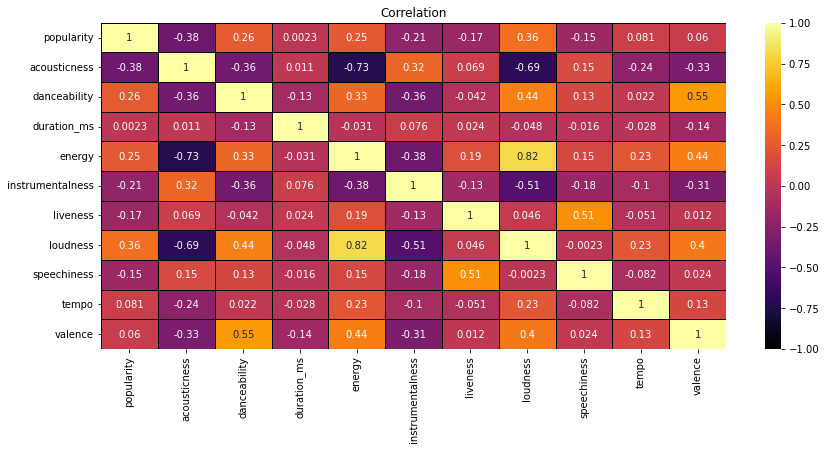

In [17]:
corr = data.corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corr, annot=True,vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="Black")
heatmap.set_title("Correlation")


### Data Visualization

<AxesSubplot:xlabel='energy', ylabel='loudness'>

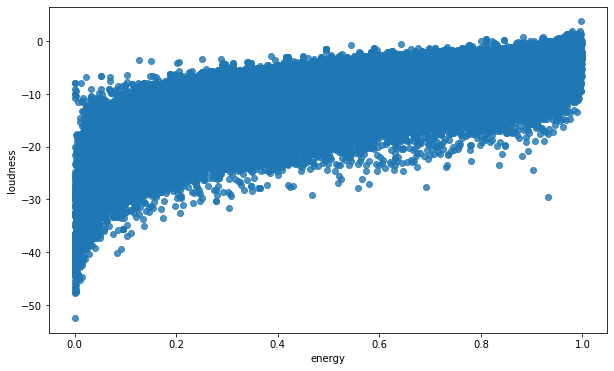

In [18]:
plt.figure(figsize=(10,6))
sns.regplot(data=data, y="loudness", x="energy")

this is unlcear due to huge dataset, so we need a smaller sample from this

In [19]:
sample = data.sample(int(0.001*len(data)))
print(len(sample))

232


[Text(0.5, 1.0, 'Loudness vs Energy')]

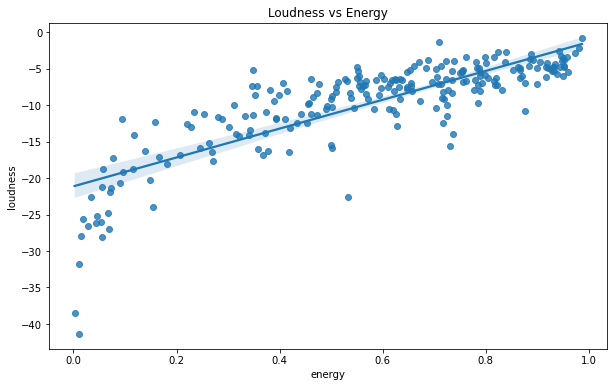

In [20]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample, y="loudness", x="energy").set(title="Loudness vs Energy")

[Text(0.5, 1.0, 'Acousticness vs Energy')]

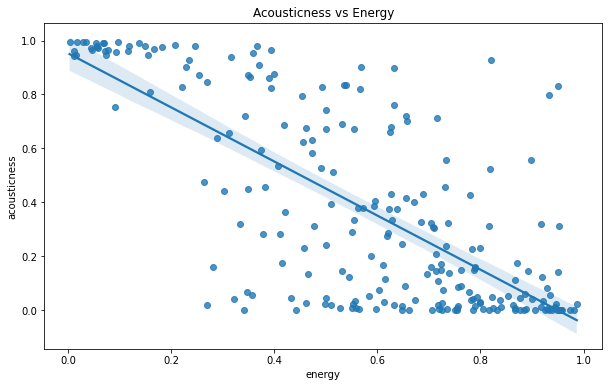

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample, y="acousticness", x="energy").set(title="Acousticness vs Energy")

<AxesSubplot:title={'center':'Duration of Songs'}, xlabel='duration_ms', ylabel='genre'>

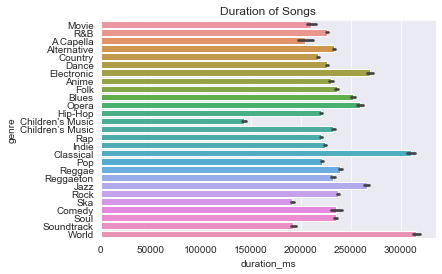

In [22]:
sns.set_style(style="darkgrid")
plt.title("Duration of Songs")
sns.color_palette("rocket", as_cmap = True)
sns.barplot(y="genre", x="duration_ms", data = data)

[Text(0.5, 1.0, 'Top 5 Genres by Popularity')]

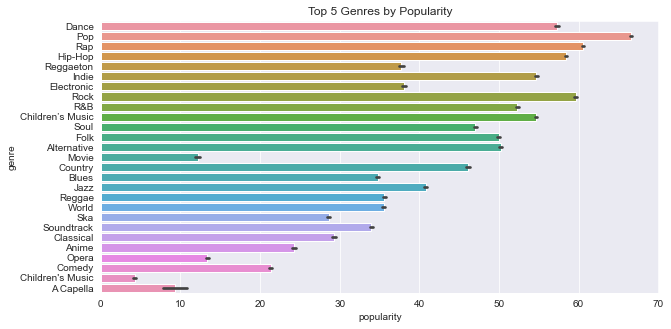

In [23]:
sns.set_style(style = "darkgrid")
plt.figure(figsize=(10,5))
famous = data.sort_values("popularity", ascending=False)
sns.barplot(y="genre", x="popularity", data = famous).set(title="Top 5 Genres by Popularity")

### Machine Learning

In [24]:
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [43]:
data.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [99]:
df = data[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']]

In [112]:
df.popularity.unique()

array([  0,   1,   3,   4,   2,  15,  10,   8,   5,   6,   7,  11,  65,
        63,  62,  61,  68,  64,  66,  60,  69,  71,  76,  67,  70,  72,
        57,  59,  56,  28,  31,  74,  55,  53,   9,  13,  23,  12,  44,
        33,  25,  26,  24,  22,  20,  19,  18,  16,  17,  14,  83,  81,
        73,  78,  77,  75,  45,  42,  46,  54,  41,  52,  58,  51,  43,
        47,  48,  40,  50,  49,  39,  80,  37,  35,  21,  38,  36,  29,
        34,  32,  99, 100,  97,  92,  91,  95,  90,  93,  88,  87,  89,
        96,  86,  85,  84,  94,  82,  79,  27,  30,  98], dtype=int64)

In [69]:
X = sample[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
Y = sample[['popularity']]

In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(185, 10) (47, 10) (185, 1) (47, 1)


(-1.0, 10.0)

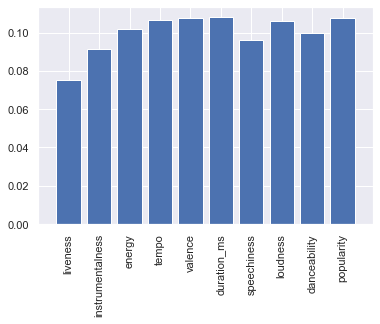

In [103]:
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, np.ravel(Y_train))
importances = forest.feature_importances_
indices = np.argsort(importance)[::1]
# plt.set_ylable('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
feat_labels = df.columns[1:]
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])

In [104]:
X = data.iloc[:, [5,12,8]].values

In [105]:
print(X)

[[  0.611   -1.828 ]
 [  0.246   -5.559 ]
 [  0.952  -13.879 ]
 ...
 [  0.901   -8.282 ]
 [  0.262   -7.137 ]
 [  0.0973  -6.708 ]]


choosing the number of clusters using WCSS(within clusters sum of squares)

In [106]:
#wcss value for different clusters
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=30)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

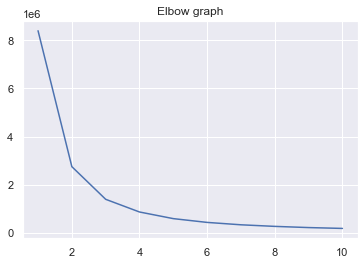

In [107]:
#elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title("Elbow graph")
plt.show()

Optimal number of clusters according to the graph is 3

#### Training the KMeans model

In [108]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0) 

In [109]:
Y = kmeans.fit_predict(X)
# print(Y)

for i in range(10):
  print(Y[i])

0
0
2
2
1
2
2
0
0
0


#### Visualization of clusters

Text(0.5, 1.0, 'Clusters')

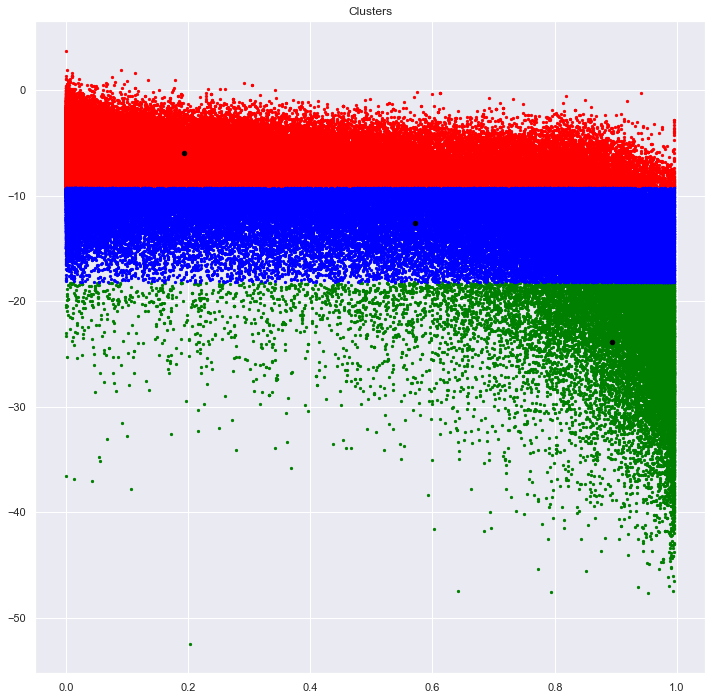

In [110]:
plt.figure(figsize=(12,12))
plt.scatter(X[Y==0,0], X[Y==0,1], s=5, c='red', label="Cluster 1")
plt.scatter(X[Y==1,0], X[Y==1,1], s=5, c='green', label="Cluster 2")
plt.scatter(X[Y==2,0], X[Y==2,1], s=5, c='blue', label="Cluster 3")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=20, c="black", label='Centroids')

plt.title("Clusters")

In [76]:
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
